<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/MERGED_ALL_MODELS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PACKAGES INSTALLING*

In [114]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE 
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, })

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>ARIMA</h1>

*IMPORT PACKAES*

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import numpy as np
import statsmodels.api as sm

*DATA LOADING*

In [118]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

*GROUPING THE DATA AND FILLING THE EMPTY VALUES BY MEDIAN*

In [119]:
data_arima = data[['Ship Date','Sales']]
data_arima = data_arima.groupby('Ship Date').sum()
data_arima = data_arima.resample('MS').median()
data_arima.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [120]:
data_arima['Sales'] = data_arima['Sales']/min(data_arima['Sales'])

*HERE THE PLOT*

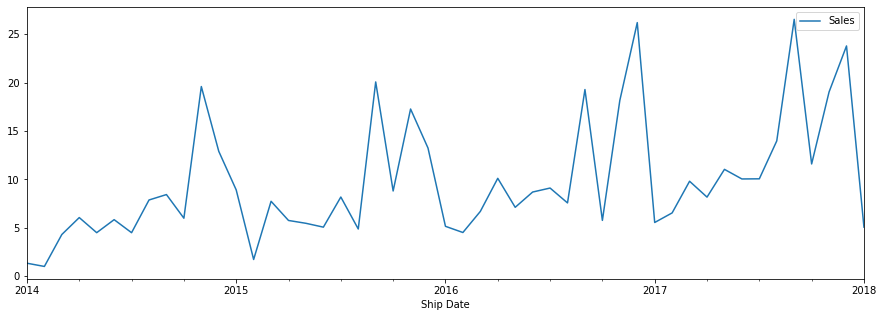

In [121]:
data_arima.plot(figsize=(15,5))
plt.show()

*INTIALING THE HYPER PARAMETERS*

In [122]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [123]:
seasons = 12
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

*APPLYING GRID SEARCH TO FIND BETTER HYPERPARAMETERS*

In [124]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model_arima = sm.tsa.statespace.SARIMAX(data_arima, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model_arima.fit()
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
**** Smallest PDQ,SPDQ is *****
127.11442363600139
(1, 1, 1)
(1, 1, 0, 12)


*HERE THE MODEL BULIDING AND FITTING*

In [125]:
model_arima = sm.tsa.statespace.SARIMAX(data_arima, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
results_arima = model_arima.fit()

In [126]:
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                 -59.557
Date:                            Fri, 17 Jun 2022   AIC                            127.114
Time:                                    14:20:18   BIC                            131.656
Sample:                                01-01-2014   HQIC                           128.257
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4363      0.263     -1.658      0.097      -0.952       0.079
ma.L1         -0.9436      0.290     -3.250      0.001      -1.513      -0.375
ar.S.L12      -0.6368      0.199     -3.206      0.001      -1.026      -0.247
sigma2         9.5923      2.882      3.329      0.001       3.945      15.240
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 5.26
Prob(Q):                               nan   Prob(JB):                         0.07
Heteroskedasticity (H):               3.49   Skew:                             0.98
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*HERE THE PREDICTIONS*

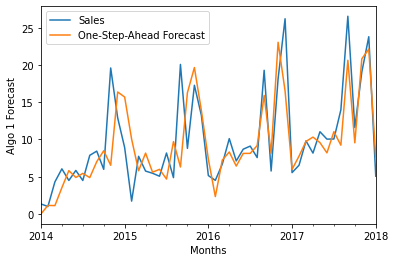

In [127]:
pred = results_arima.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data_arima['2014':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
#ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()

In [128]:
arr = data_arima['Sales'].values
ac = pred.predicted_mean.values

In [129]:
forecast_accuracy(ac,arr)

{'mae': 2.9545745541856703,
 'mape': 0.40265798936023695,
 'me': -0.37951624544122137,
 'mpe': 0.09628837039933469,
 'rmse': 4.223695163446492}

In [130]:
data2_arima = data_arima.copy()
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future_prediction = pd.DataFrame(index=date_list, columns= data_arima.columns)
data2_arima = pd.concat([data2_arima, future_prediction])

In [131]:
data2_arima

,Sales
2014-01-01,1.333944
2014-02-01,1.000000
2014-03-01,4.301590
2014-04-01,6.051472
2014-05-01,4.490913
...,...
2018-08-01,NaN
2018-09-01,NaN
2018-10-01,NaN
2018-11-01,NaN


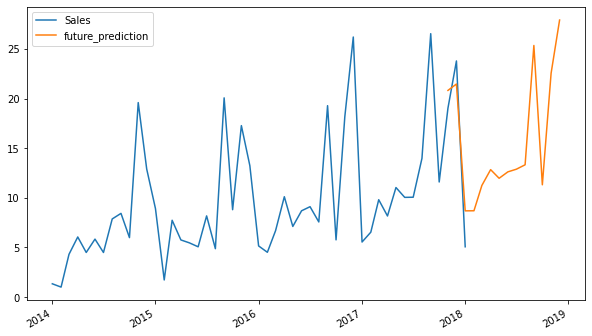

In [132]:
data2_arima['future_prediction']=results_arima.predict(start=46, end=60 ,dynamic=True)
data2_arima[['Sales','future_prediction']].plot(figsize=(10, 6))
plt.show()

In [133]:
data2_arima.tail(20)

,Sales,future_prediction
2017-06-01,10.043839,NaN
2017-07-01,10.058615,NaN
2017-08-01,13.977369,NaN
2017-09-01,26.542118,NaN
2017-10-01,11.594986,NaN
2017-11-01,19.039445,20.825841
2017-12-01,23.793686,21.467720
2018-01-01,5.064220,8.685639
2018-01-01,NaN,8.685639
2018-02-01,NaN,8.693579


<h1>LSTM</h1>

In [134]:
data_lstm = data[['Ship Date','Sales']]
data_lstm = data_lstm.groupby('Ship Date').sum()
data_lstm = data_lstm.resample('MS').median()
data_lstm.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [135]:
num_lstm = data_lstm.values

In [136]:
num1_lstm = num_lstm/min(num_lstm)
num1_lstm

array([[ 1.33394419],
       [ 1.        ],
       [ 4.3015897 ],
       [ 6.05147183],
       [ 4.49091281],
       [ 5.83631495],
       [ 4.48876   ],
       [ 7.86992376],
       [ 8.43020701],
       [ 5.9868963 ],
       [19.59643184],
       [12.90169112],
       [ 8.91275765],
       [ 1.71976052],
       [ 7.73563975],
       [ 5.7530046 ],
       [ 5.45941234],
       [ 5.06175552],
       [ 8.17637954],
       [ 4.87140938],
       [20.07292881],
       [ 8.80189661],
       [17.27444823],
       [13.23658717],
       [ 5.14900677],
       [ 4.50911388],
       [ 6.68817553],
       [10.10991807],
       [ 7.11310281],
       [ 8.69147148],
       [ 9.10441149],
       [ 7.56666163],
       [19.28581722],
       [ 5.76150021],
       [18.16295113],
       [26.20554038],
       [ 5.54403484],
       [ 6.53475194],
       [ 9.80712742],
       [ 8.16737686],
       [11.03626869],
       [10.04383913],
       [10.05861526],
       [13.97736876],
       [26.54211776],
       [11

In [137]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [138]:
n_steps = 3
# split into samples
X_lstm, y_lstm = prepare_data(num1_lstm, n_steps)

In [139]:
print(X_lstm),print(y_lstm)

[[[ 1.33394419]
  [ 1.        ]
  [ 4.3015897 ]]

 [[ 1.        ]
  [ 4.3015897 ]
  [ 6.05147183]]

 [[ 4.3015897 ]
  [ 6.05147183]
  [ 4.49091281]]

 [[ 6.05147183]
  [ 4.49091281]
  [ 5.83631495]]

 [[ 4.49091281]
  [ 5.83631495]
  [ 4.48876   ]]

 [[ 5.83631495]
  [ 4.48876   ]
  [ 7.86992376]]

 [[ 4.48876   ]
  [ 7.86992376]
  [ 8.43020701]]

 [[ 7.86992376]
  [ 8.43020701]
  [ 5.9868963 ]]

 [[ 8.43020701]
  [ 5.9868963 ]
  [19.59643184]]

 [[ 5.9868963 ]
  [19.59643184]
  [12.90169112]]

 [[19.59643184]
  [12.90169112]
  [ 8.91275765]]

 [[12.90169112]
  [ 8.91275765]
  [ 1.71976052]]

 [[ 8.91275765]
  [ 1.71976052]
  [ 7.73563975]]

 [[ 1.71976052]
  [ 7.73563975]
  [ 5.7530046 ]]

 [[ 7.73563975]
  [ 5.7530046 ]
  [ 5.45941234]]

 [[ 5.7530046 ]
  [ 5.45941234]
  [ 5.06175552]]

 [[ 5.45941234]
  [ 5.06175552]
  [ 8.17637954]]

 [[ 5.06175552]
  [ 8.17637954]
  [ 4.87140938]]

 [[ 8.17637954]
  [ 4.87140938]
  [20.07292881]]

 [[ 4.87140938]
  [20.07292881]
  [ 8.80189661]]



(None, None)

In [140]:
n_features = 1
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], n_features))

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [142]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
# fit model
model_lstm.fit(X_lstm, y_lstm, epochs=300, verbose=1)

Epoch 1/300
2/2 [==============================] - 6s 19ms/step - loss: 143.6491
Epoch 2/300
2/2 [==============================] - 0s 14ms/step - loss: 142.2102
Epoch 3/300
2/2 [==============================] - 0s 25ms/step - loss: 140.6536
Epoch 4/300
2/2 [==============================] - 0s 13ms/step - loss: 139.0262
Epoch 5/300
2/2 [==============================] - 0s 23ms/step - loss: 137.3127
Epoch 6/300
2/2 [==============================] - 0s 18ms/step - loss: 135.3040
Epoch 7/300
2/2 [==============================] - 0s 13ms/step - loss: 133.1943
Epoch 8/300
2/2 [==============================] - 0s 13ms/step - loss: 130.6248
Epoch 9/300
2/2 [==============================] - 0s 15ms/step - loss: 127.4766
Epoch 10/300
2/2 [==============================] - 0s 46ms/step - loss: 123.9771
Epoch 11/300
2/2 [==============================] - 0s 12ms/step - loss: 119.7117
Epoch 12/300
2/2 [==============================] - 0s 13ms/step - loss: 113.7339
Epoch 13/300
2/2 [=======

In [143]:
y_pred_lstm = model_lstm.predict(X_lstm)
y_plot_pred_lstm = y_pred_lstm.reshape(y_pred_lstm.shape[0])
y_plot_pred_lstm.shape

(46,)

In [144]:
y_plot_present_lstm = y_lstm.reshape(y_lstm.shape[0])
y_plot_present_lstm

array([ 6.05147183,  4.49091281,  5.83631495,  4.48876   ,  7.86992376,
        8.43020701,  5.9868963 , 19.59643184, 12.90169112,  8.91275765,
        1.71976052,  7.73563975,  5.7530046 ,  5.45941234,  5.06175552,
        8.17637954,  4.87140938, 20.07292881,  8.80189661, 17.27444823,
       13.23658717,  5.14900677,  4.50911388,  6.68817553, 10.10991807,
        7.11310281,  8.69147148,  9.10441149,  7.56666163, 19.28581722,
        5.76150021, 18.16295113, 26.20554038,  5.54403484,  6.53475194,
        9.80712742,  8.16737686, 11.03626869, 10.04383913, 10.05861526,
       13.97736876, 26.54211776, 11.59498626, 19.03944454, 23.79368567,
        5.06421969])

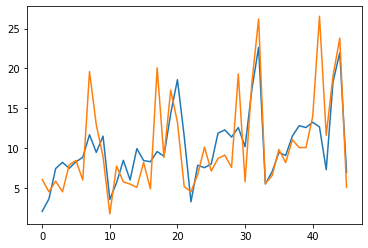

In [145]:
plt.plot(y_plot_pred_lstm)
plt.plot(y_plot_present_lstm)
plt.show()

In [146]:
l_lstm = []
for i in num1_lstm[-3:]:
  for j in i:
    l_lstm.append(j)

In [147]:
x_input_lstm = np.array(l_lstm)
temp_input_lstm=list(x_input_lstm)
lst_output_lstm=[]
i=0
while(i<20):
    
    if(len(temp_input_lstm)>3):
        x_input_lstm=np.array(temp_input_lstm[1:])
        print("{} day input {}".format(i,x_input_lstm))
        #print(x_input)
        x_input_lstm = x_input_lstm.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat_lstm = model_lstm.predict(x_input_lstm, verbose=0)
        print("{} day output {}".format(i,yhat_lstm))
        temp_input_lstm.append(yhat_lstm[0][0])
        temp_input_lstm=temp_input_lstm[1:]
        #print(temp_input)
        lst_output_lstm.append(yhat_lstm[0][0])
        i=i+1
    else:
        x_input_lstm = x_input_lstm.reshape((1, n_steps, n_features))
        yhat_lstm = model_lstm.predict(x_input_lstm, verbose=0)
        print(yhat_lstm[0])
        temp_input_lstm.append(yhat_lstm[0][0])
        lst_output_lstm.append(yhat_lstm[0][0])
        i=i+1
    

print(lst_output_lstm)

[4.0833635]
1 day input [23.79368567  5.06421969  4.08336353]
1 day output [[7.104689]]
2 day input [5.06421969 4.08336353 7.10468912]
2 day output [[7.240253]]
3 day input [4.0833635 7.104689  7.240253 ]
3 day output [[8.140981]]
4 day input [7.104689 7.240253 8.140981]
4 day output [[10.801367]]
5 day input [ 7.240253  8.140981 10.801367]
5 day output [[11.099762]]
6 day input [ 8.140981 10.801367 11.099762]
6 day output [[12.271842]]
7 day input [10.801367 11.099762 12.271842]
7 day output [[13.24867]]
8 day input [11.099762 12.271842 13.24867 ]
8 day output [[13.064619]]
9 day input [12.271842 13.24867  13.064619]
9 day output [[13.265147]]
10 day input [13.24867  13.064619 13.265147]
10 day output [[13.301368]]
11 day input [13.064619 13.265147 13.301368]
11 day output [[13.34292]]
12 day input [13.265147 13.301368 13.34292 ]
12 day output [[13.28492]]
13 day input [13.301368 13.34292  13.28492 ]
13 day output [[13.258574]]
14 day input [13.34292  13.28492  13.258574]
14 day outpu

In [148]:
l2_lstm = []
for i in y_plot_pred_lstm:
  l2_lstm.append(i)
print(l2_lstm)

[2.036049, 3.6059387, 7.4239273, 8.199217, 7.450784, 8.26876, 8.826407, 11.662852, 9.447062, 11.48757, 3.5490212, 5.6312833, 8.446526, 5.9833674, 9.919535, 8.417356, 8.2754755, 9.548039, 8.962402, 14.308376, 18.576017, 11.473163, 3.2446802, 7.833417, 7.5252385, 7.9983034, 11.866115, 12.264538, 11.370438, 12.563162, 10.157163, 17.331629, 22.641829, 5.4781413, 7.0166306, 9.43245, 9.059627, 11.50908, 12.793583, 12.56673, 13.234405, 12.64291, 7.269026, 18.293335, 21.968111, 6.941318]


In [149]:
for i in lst_output_lstm:
  l2_lstm.append(i)

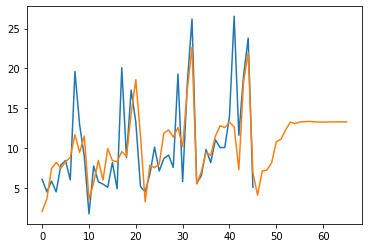

In [150]:
import matplotlib.pyplot as plt
plt.plot(y_plot_present_lstm)
plt.plot(l2_lstm)
plt.show()

In [151]:
date_lstm = pd.date_range(start='2018-02-01',end='2019-09-01', freq='MS')
lst_output_data_lstm = lst_output_lstm*min(num_lstm)

In [152]:
data3_lstm = pd.DataFrame(date_lstm,lst_output_lstm*min(num_lstm))
data3_lstm

,0
459.014978,2018-02-01
798.645209,2018-03-01
813.884077,2018-04-01
915.135784,2018-05-01
1214.192444,2018-06-01
1247.735342,2018-07-01
1379.490031,2018-08-01
1489.296201,2018-09-01
1468.606894,2018-10-01
1491.148463,2018-11-01


<h1>XGBOOST</h1>

In [153]:
data_xg = data[['Ship Date','Sales']]
data_xg = data_xg.groupby('Ship Date').sum()
data_xg = data_xg.resample('MS').median()
data_xg.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [154]:
num_xg = data_xg.values

In [155]:
num1_xg = num_xg/min(num_xg)
num1_xg

array([[ 1.33394419],
       [ 1.        ],
       [ 4.3015897 ],
       [ 6.05147183],
       [ 4.49091281],
       [ 5.83631495],
       [ 4.48876   ],
       [ 7.86992376],
       [ 8.43020701],
       [ 5.9868963 ],
       [19.59643184],
       [12.90169112],
       [ 8.91275765],
       [ 1.71976052],
       [ 7.73563975],
       [ 5.7530046 ],
       [ 5.45941234],
       [ 5.06175552],
       [ 8.17637954],
       [ 4.87140938],
       [20.07292881],
       [ 8.80189661],
       [17.27444823],
       [13.23658717],
       [ 5.14900677],
       [ 4.50911388],
       [ 6.68817553],
       [10.10991807],
       [ 7.11310281],
       [ 8.69147148],
       [ 9.10441149],
       [ 7.56666163],
       [19.28581722],
       [ 5.76150021],
       [18.16295113],
       [26.20554038],
       [ 5.54403484],
       [ 6.53475194],
       [ 9.80712742],
       [ 8.16737686],
       [11.03626869],
       [10.04383913],
       [10.05861526],
       [13.97736876],
       [26.54211776],
       [11

In [156]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [157]:
n_steps = 3
# split into samples
X_xg, y_xg = prepare_data(num1_xg, n_steps)

In [158]:
print(X_xg),print(y_xg)

[[[ 1.33394419]
  [ 1.        ]
  [ 4.3015897 ]]

 [[ 1.        ]
  [ 4.3015897 ]
  [ 6.05147183]]

 [[ 4.3015897 ]
  [ 6.05147183]
  [ 4.49091281]]

 [[ 6.05147183]
  [ 4.49091281]
  [ 5.83631495]]

 [[ 4.49091281]
  [ 5.83631495]
  [ 4.48876   ]]

 [[ 5.83631495]
  [ 4.48876   ]
  [ 7.86992376]]

 [[ 4.48876   ]
  [ 7.86992376]
  [ 8.43020701]]

 [[ 7.86992376]
  [ 8.43020701]
  [ 5.9868963 ]]

 [[ 8.43020701]
  [ 5.9868963 ]
  [19.59643184]]

 [[ 5.9868963 ]
  [19.59643184]
  [12.90169112]]

 [[19.59643184]
  [12.90169112]
  [ 8.91275765]]

 [[12.90169112]
  [ 8.91275765]
  [ 1.71976052]]

 [[ 8.91275765]
  [ 1.71976052]
  [ 7.73563975]]

 [[ 1.71976052]
  [ 7.73563975]
  [ 5.7530046 ]]

 [[ 7.73563975]
  [ 5.7530046 ]
  [ 5.45941234]]

 [[ 5.7530046 ]
  [ 5.45941234]
  [ 5.06175552]]

 [[ 5.45941234]
  [ 5.06175552]
  [ 8.17637954]]

 [[ 5.06175552]
  [ 8.17637954]
  [ 4.87140938]]

 [[ 8.17637954]
  [ 4.87140938]
  [20.07292881]]

 [[ 4.87140938]
  [20.07292881]
  [ 8.80189661]]



(None, None)

In [159]:
X_xg = X_xg.reshape((X_xg.shape[0], X_xg.shape[1]))
y_xg = y_xg.reshape(y_xg.shape[0])

In [160]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

In [161]:
xgb_r.fit(X_xg, y_xg)

[14:20:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=123)

In [162]:
y_pred_xg = xgb_r.predict(X_xg)

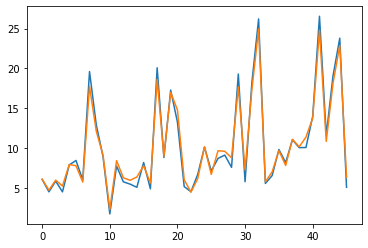

In [163]:
import matplotlib.pyplot as plt
plt.plot(y_xg)
plt.plot(y_pred_xg)
plt.show()

In [164]:
forecast_accuracy(y_pred_xg,y_xg)

{'mae': 0.6810354720454652,
 'mape': 0.08009794609755747,
 'me': 0.00017894574120746537,
 'mpe': 0.03456499804466155,
 'rmse': 0.8564860845417669}

In [165]:
l_xg = []
for i in num1_xg[-3:]:
  for j in i:
    l_xg.append(j)

In [166]:
l_xg

[19.039444538345894, 23.793685671331094, 5.064219693802208]

In [167]:
x_input_xg = np.array(l_xg)
temp_input_xg=list(x_input_xg)
lst_output_xg=[]
i=0
while(i<20):
    
    if(len(temp_input_xg)>3):
        x_input_xg=np.array(temp_input_xg[1:])
        print("{} day input {}".format(i,x_input_xg))
        #print(x_input)
        x_input_xg = x_input_xg.reshape(1,3)
        #print(x_input)
        yhat_xg = xgb_r.predict(x_input_xg)
        print("{} day output {}".format(i,yhat_xg))
        temp_input_xg.append(yhat_xg[0])
        temp_input_xg=temp_input_xg[1:]
        #print(temp_input)
        lst_output_xg.append(yhat_xg[0])
        i=i+1
    else:
        x_input_xg = x_input_xg.reshape(1,3)
        yhat_xg = xgb_r.predict(x_input_xg)
        print(yhat_xg[0])
        temp_input_xg.append(yhat_xg[0])
        lst_output_xg.append(yhat_xg[0])
        i=i+1
    

print(lst_output_xg)

8.496529
1 day input [23.79368567  5.06421969  8.49652863]
1 day output [7.443159]
2 day input [5.06421969 8.49652863 7.4431591 ]
2 day output [18.544426]
3 day input [ 8.496529  7.443159 18.544426]
3 day output [21.716692]
4 day input [ 7.443159 18.544426 21.716692]
4 day output [7.2125797]
5 day input [18.544426  21.716692   7.2125797]
5 day output [9.636567]
6 day input [21.716692   7.2125797  9.636567 ]
6 day output [7.0302806]
7 day input [7.2125797 9.636567  7.0302806]
7 day output [12.165063]
8 day input [ 9.636567   7.0302806 12.165063 ]
8 day output [11.6622095]
9 day input [ 7.0302806 12.165063  11.6622095]
9 day output [6.938306]
10 day input [12.165063  11.6622095  6.938306 ]
10 day output [10.40269]
11 day input [11.6622095  6.938306  10.40269  ]
11 day output [9.73619]
12 day input [ 6.938306 10.40269   9.73619 ]
12 day output [7.6470613]
13 day input [10.40269    9.73619    7.6470613]
13 day output [15.205476]
14 day input [ 9.73619    7.6470613 15.205476 ]
14 day output

In [168]:
l2_xg = []
for i in y_pred_xg:
  l2_xg.append(i)
print(l2_xg)

[6.087861, 4.702067, 5.9602304, 5.21722, 7.915592, 7.774254, 5.7204027, 17.715523, 12.118702, 9.082234, 2.270389, 8.417998, 6.2606616, 5.9412074, 6.359717, 7.7591677, 5.6020236, 18.612713, 8.953306, 16.982737, 14.775322, 6.0134473, 4.452443, 6.163789, 10.156446, 6.683559, 9.651969, 9.579707, 8.773639, 17.65734, 7.2329125, 17.263914, 24.93476, 5.7651825, 6.9930544, 9.665568, 7.8029943, 11.091879, 10.147011, 11.358931, 13.766332, 24.76202, 10.828839, 18.131838, 22.869198, 6.3122296]


In [169]:
for i in lst_output_xg:
  l2_xg.append(i)

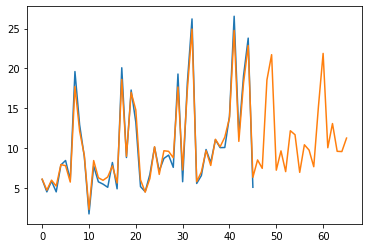

In [170]:
import matplotlib.pyplot as plt
plt.plot(y_xg)
plt.plot(l2_xg)
plt.show()

In [171]:
date_xg = pd.date_range(start='2018-02-01',end='2019-09-01', freq='MS')
lst_output_data_xg = lst_output_xg*min(num_xg)

In [172]:
data3_xg = pd.DataFrame(date_xg,lst_output_xg*min(num_xg))
data3_xg

,0
955.103279,2018-02-01
836.692958,2018-03-01
2084.597467,2018-04-01
2441.195061,2018-05-01
810.773300,2018-06-01
1083.256146,2018-07-01
790.280871,2018-08-01
1367.486886,2018-09-01
1310.960633,2018-10-01
779.941899,2018-11-01


In [173]:
dict_arima = forecast_accuracy(ac,arr)
dict_lstm = forecast_accuracy(y_pred_lstm,y_lstm)
dict_xg = forecast_accuracy(y_pred_xg,y_xg)

In [174]:
data_m = pd.DataFrame({'Arima':pd.Series(dict_arima),'Lstm':pd.Series(dict_lstm),'Xgboost':pd.Series(dict_xg)})
data_m

,Arima,Lstm,Xgboost
mape,0.402658,0.325582,0.080098
me,-0.379516,-0.169111,0.000179
mae,2.954575,2.848789,0.681035
mpe,0.096288,0.118798,0.034565
rmse,4.223695,3.955031,0.856486


(-1.0, 5.0)

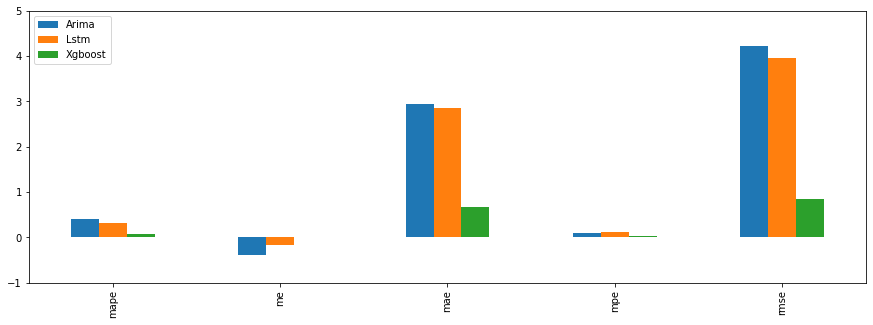

In [175]:
ax = data_m.plot(kind='bar',figsize=(15,5))
ax.set_ylim(-1,5)